In [30]:
#Task 4.2
# For data creation and other tasks
import numpy as np
import random
import pandas as pd

## Mertics to evaluate the models
from sklearn . metrics import accuracy_score # for Logistic Regression

# For plotting the graphs ..
import matplotlib.pyplot as plt
import seaborn as sns

# For spliting the data into 80:20 ratio
from sklearn . model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [4]:
#Task 4.1

df = pd.read_csv('column_2C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
#Task 4.3
def weightInitialization(n_features):
    w = np.zeros((n_features, 1))
    b = 0.0
    return w,b

print(weightInitialization(5))

(array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 0.0)


In [10]:
#Task 4.4
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

In [57]:
#Task 4.5
def model_optimize(w, b, X, Y):
    
    # First find out number of data points
    m = X.shape[1]
    
    # Get the prediction
    z = np.dot(X, w) + b
    
    y_hat = sigmoid_activation(z)
    
    # Find the cost/loss
    
    L = -np.mean(Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat))
    
    # Calculate the gradients
    
    dw = (1/m) * np.dot(X.T, (y_hat - Y))
    db = (1/m) * np.sum(y_hat - Y)
    
    grads = {"dw": dw , "db": db}
    
    return grads, L

In [61]:
#Task 4.6
def model_fit (w, b, X, Y, learning_rate , no_iterations ):
    
    costs = []
    
    for i in range ( no_iterations ):
        grads , cost = model_optimize (w,b,X,Y)
        dw = grads ["dw"]
        db = grads ["db"]

        # Update the weights here
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if (i % 10 == 0):
            costs.append(cost)
            #print (" Cost after %i iteration is %f" %(i, cost ))
        
    # final parameters
    
    coeff = {"w": w, "b": b}
    
    return coeff , costs

In [71]:
#Task 4.7

X = df.drop(columns=['class'])
Y = df['class']

class_mapping = {'Abnormal': 0, 'Normal': 1}

Y_mapped = Y.map(class_mapping)

scaler = MinMaxScaler()

# Fit and transform the scaler on your data
normalized_X = scaler.fit_transform(X)

# split the data in train and test split in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y_mapped, test_size=0.3, random_state=42)

#print(X_train, Y_train)

# Get the best weights and bias

learning_rate = 0.01
num_iterations = 1000

w, b = weightInitialization(X_train.shape[1])

Y_train= np.expand_dims(Y_train, axis=1)

coeff, costs = model_fit(w, b, X_train, Y_train, learning_rate, num_iterations)

w_new = coeff['w']
b_new = coeff['b']

# Use those to get the predictions for the test dataset

Z = np.dot(X_test, w) + b
predictions = sigmoid_activation(Z)

# Finally check the accuracy score

threshold = 0.5  # Threshold for classification
predicted_labels = (predictions >= threshold).astype(int)
accuracy = accuracy_score(Y_test, predicted_labels)

print("Accuracy on the test dataset:", accuracy)

Accuracy on the test dataset: 0.7956989247311828


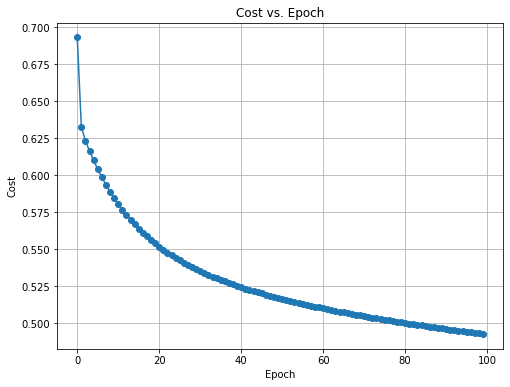

In [74]:
#Task 4.8

plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, marker='o', linestyle='-')
plt.title('Cost vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [79]:
#Task 4.9

def use_smaller_portion():

    X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y_mapped, test_size=0.9, random_state=42)

    # Get the best weights and bias

    learning_rate = 0.01
    num_iterations = 1000

    w, b = weightInitialization(X_train.shape[1])

    Y_train= np.expand_dims(Y_train, axis=1)

    coeff, costs = model_fit(w, b, X_train, Y_train, learning_rate, num_iterations)

    w_new = coeff['w']
    b_new = coeff['b']

    # Use those to get the predictions for the test dataset

    Z = np.dot(X_test, w) + b
    predictions = sigmoid_activation(Z)

    # Finally check the accuracy score

    threshold = 0.5  # Threshold for classification
    predicted_labels = (predictions >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, predicted_labels)

    print("Accuracy on the test dataset:", accuracy)

In [80]:
use_smaller_portion()

Accuracy on the test dataset: 0.6881720430107527
